<a href="https://colab.research.google.com/github/ChintzRuparel/Computer-Vision/blob/main/Experiment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer Vision EXP 5
   **Chintan Ruparel**

  **C086**

  **C1**

  Aim : To determine SIFT descriptors for the given image. Apply the same descriptor for resize, rotated and cropped images.Apply key point matcher to detect corresponding key points in the images.

In [ ]:
#To plot the image.
import matplotlib.pyplot as plt

#Computer vision version 2.
import cv2

#rotate the image
import imutils


In [ ]:
image_o = cv2.imread('eiffel.PNG')

#resized, rotate and cropped image
image_rs = cv2.resize(image_o,(300,200))
image_rt = imutils.rotate(image_o,10)
image_cr = image_o[0:400,100:300]

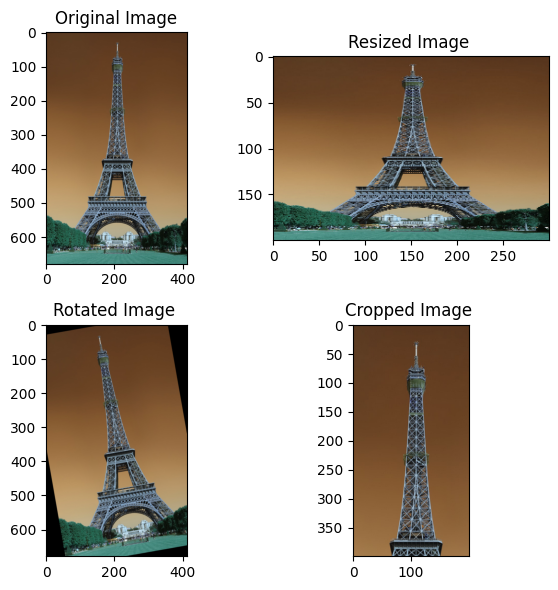

In [ ]:
plt.figure(figsize = (6,6))
plt.subplot(2,2,1)
plt.imshow(image_o)
plt.title('Original Image')

plt.subplot(2,2,2)
plt.imshow(image_rs)
plt.title('Resized Image ')

plt.subplot(2,2,3)
plt.imshow(image_rt)
plt.title('Rotated Image ')

plt.subplot(2,2,4)
plt.imshow(image_cr)
plt.title('Cropped Image ')

plt.tight_layout()

Text(0.5, 1.0, 'Original Image after sift')

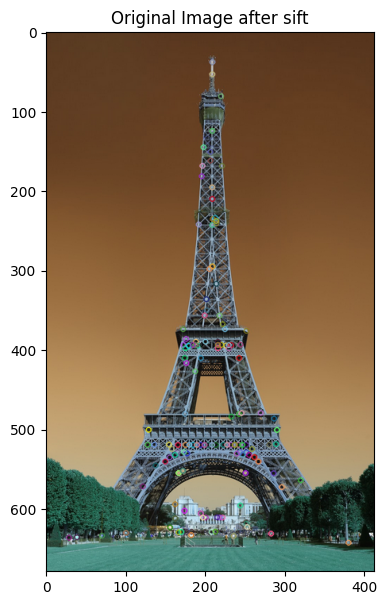

In [ ]:
#Apply sift operator
#Nfeatures shows the key points
#show oiginal image with keypoints
#above contrastthreshold are true keypoints
#k_o locaion of key point
#d_o is descriptor of key point

sift = cv2.xfeatures2d.SIFT_create(nfeatures=200,contrastThreshold=0.03)
k_o,d_o = sift.detectAndCompute(image_o,None)
cv2.drawKeypoints(image_o,k_o,image_o)
plt.figure(figsize = (7,7))
plt.imshow(image_o)
plt.title('Original Image after sift')

Text(0.5, 1.0, 'Resized Image after sift')

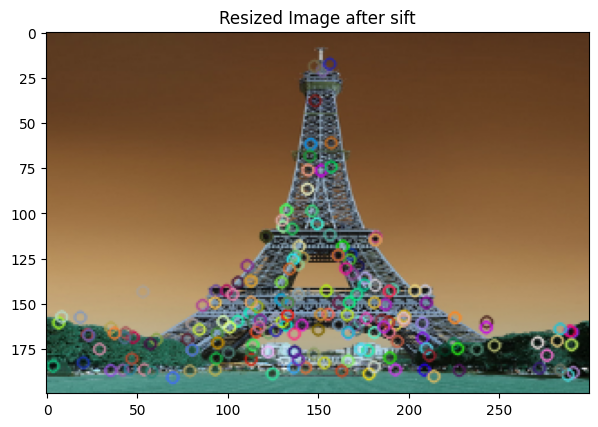

In [ ]:
k_rs,d_rs = sift.detectAndCompute(image_rs,None)
cv2.drawKeypoints(image_rs,k_rs,image_rs)
plt.figure(figsize = (7,7))
plt.imshow(image_rs)
plt.title('Resized Image after sift')

Text(0.5, 1.0, 'Rotated Image after sift')

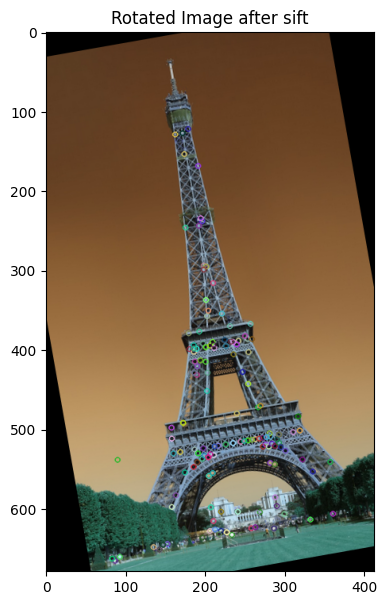

In [ ]:
k_rt,d_rt = sift.detectAndCompute(image_rt,None)
cv2.drawKeypoints(image_rt,k_rt,image_rt)
plt.figure(figsize = (7,7))
plt.imshow(image_rt)
plt.title('Rotated Image after sift')

Text(0.5, 1.0, 'Cropped Image after sift')

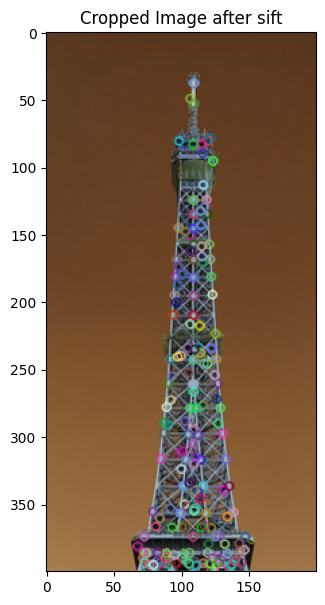

In [ ]:
k_cr,d_cr = sift.detectAndCompute(image_cr,None)
cv2.drawKeypoints(image_cr,k_cr,image_cr)
plt.figure(figsize = (7,7))
plt.imshow(image_cr)
plt.title('Cropped Image after sift')

In [ ]:
len(k_o)

200

In [ ]:
len(d_o)

200

In [ ]:
len(d_o[0])

128

In [48]:
# match the keypoints of original image with resized, rotated and cropped image.
bf = cv2.BFMatcher()
match_o_rs = bf.match(d_o,d_rs)
match_o_rt = bf.match(d_o,d_rt)
match_o_cr = bf.match(d_o,d_cr)

match_o_rs = sorted(match_o_rs,key = lambda val:val.distance)
out_o_rs = cv2.drawMatches(image_o,k_o,image_rs,k_rs,match_o_rs[0:20],None)

match_o_rt = sorted(match_o_rt,key = lambda val:val.distance)
out_o_rt = cv2.drawMatches(image_o,k_o,image_rt,k_rt,match_o_rt[0:20],None)

match_o_cr = sorted(match_o_cr,key = lambda val:val.distance)
out_o_cr = cv2.drawMatches(image_o,k_o,image_cr,k_cr,match_o_cr[0:20],None)

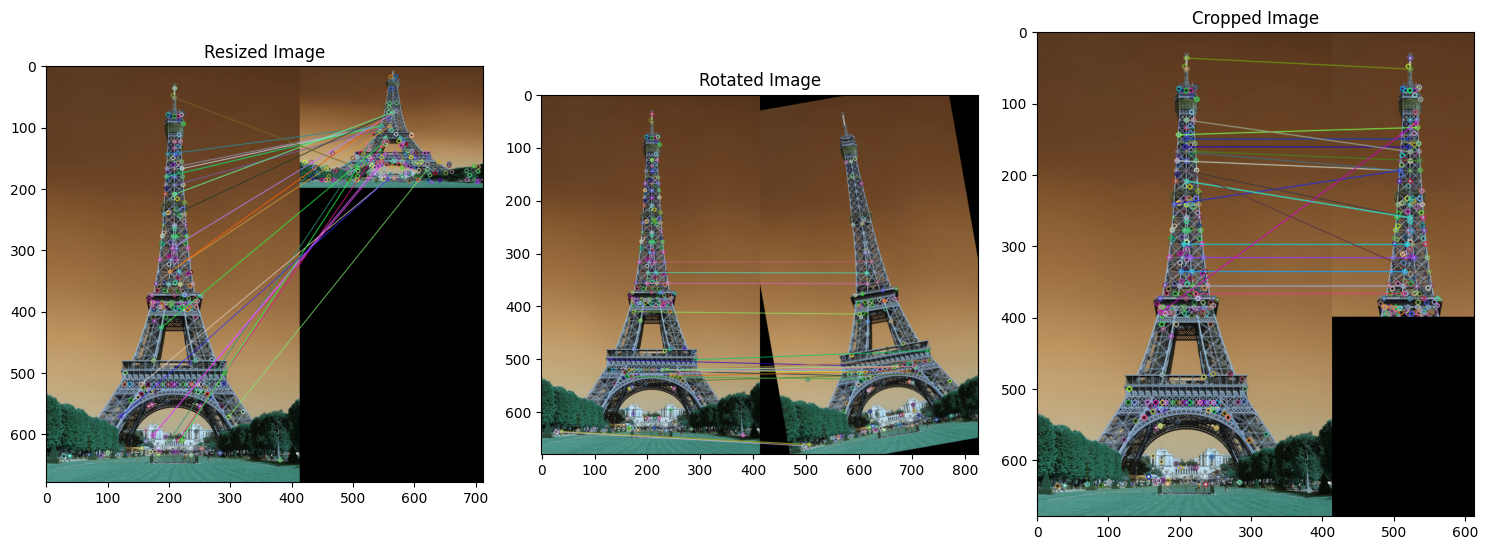

In [53]:
plt.figure(figsize = (15,15))
plt.subplot(1,3,1)
plt.imshow(out_o_rs)
plt.title("Resized Image")

plt.subplot(1,3,2)
plt.imshow(out_o_rt)
plt.title("Rotated Image")

plt.subplot(1,3,3)
plt.imshow(out_o_cr)
plt.title("Cropped Image")

plt.tight_layout()

#Conclusion :
1. SIFT is applied on the original, resized, rotated and cropped image.
2. It is shown that, even after modifying the image, most of the key points of the original image are matching with the modified image.
3. The same is shown on the images which have matched keypoints.